# Experiments on Dai's Framework

In this notebook we study a set of extensions to a basic stopping algorithm by Dai et al.
We analyse the performance and quality according to a set of metrics defined below and we compare with the basic Dai's algorithm.


In [1]:
from pomdp_extensions import *

## Metrics: 
 - **Classification cost** Each vote has a cost (assumed to be 1), and we compute the total cost for classifying all items
 - **Weighted classificaiton error = (fpc * FP + fnc * FN + ucc*UC)/N** FP= false positives, FB = false negatives, UC= items left unclassified, N= total number of items on which we reached a decision (or a decision to leave them unclassified), fpc= false positive cost, fnc = false negative cost, ucc=unclassified cost. Notice that loss here is INDEPENDENT of the cost
 - **Precision and Recall, F1, Fbeta**



## Baselines
- We compare with other baselines, which are:
 - fixed number of votes
 - two and break the tie
 - stop after S consecutive same votes
 - stop when difference among two classes greater than X

## Extensions to Dai's framework:
We consider the following extensions

- Varying the cost for giving the wrong answer (this means varying fpc and fnc)
- Dai divides the continuous space of (difficulty, true label) in (11*2)+1 discrete classes, we explore what happens as we reduce or increase this number
- We add one more action, which is leave the items unclassified.
- We experiment in sceanrios with varying error rates distribution for the workers
- We use workers confusion matrix for error rates as opposed to "plain" error rates that are independent of the true label
- we explore the above over a variety of real and simulated datasets
- We experiment with balanced and unbalanced datasets
- We experiment with adding a prior based on an estimation of the dataset balance
- (Future: see what changes for multi predicate)
- **Estimate after ('after' in plots) means that workers error rate $\gamma$ estimation using EM starts after submitting the first answer, otherwise we try estimating $\gamma$ after collecting 2 votes over an item** We compare with Dai's who i) they take one vote per item at each iteration, ii) they re-estimate error rates ONLY after doing the transitions. We want to see what happens if we do that before.

### 1. Try POMDP models with different rewards

In this set of experiments we consider how POMDP performs with respect to the baselines, on our set of test datasets, and we vary the two parameters, **fnc** and **fpc**.

Also, for all experiments, we test the difference between conputing error rates (running EM) before or after updating the POMDP

## Experiment settings
### POMDP definition: 
 - States: 23
 - Actions: 3 = {RequestVote, SubmitFalse, SubmitTrue}
 
 Transitions: 
 - $T(S_i, Action=RequestVote, S_i) = 1$
 - $T(S_i, Action=SubmitTrue, S_{terminal}) = 1$
 - $T(S_i, Action=SubmitFalse, S_{terminal}) = 1$
 
 Observations probabilities:
 - $O(S_i, RequestVote, CorrectAnswer) = Acc$
 - $O(S_i, RequestVote, IncorrectAnswer) = 1 - Acc$
 
 Worker Accuracy Formula:
 - $Acc(d, \gamma) = \frac{1}{2} (1 + (1 - d)^{\gamma}) $
 
 Rewards:
 - Request vote: -1
 - Correct answer: 0
 - Beta = fnc/fpc 
 
 

Workers:
 - Binary classification
 - 1000 items
 - average number of votes per worker: (5, 10, 20)
 - Error rate distribution: $\gamma \sim Normal(1, 0.2)$
 - Accuracy ±75%
 
Variations of the experiment:
 - fpc = fnc = {-1, -10, -20, -50, -500, -1000}
 - same for fpc, but we make fnc = fpc * 10, and fnc = fpc * 100
 - as the error rate distribution varies

 

Num Workers: [100]
Workers Distribution: ['Normal(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.5]
Items Difficulty: [0.5]
Num states: [23]
Error Estimations: [False  True]
False Negative Costs == False Positive Costs: [  10   20   50  500 1000]


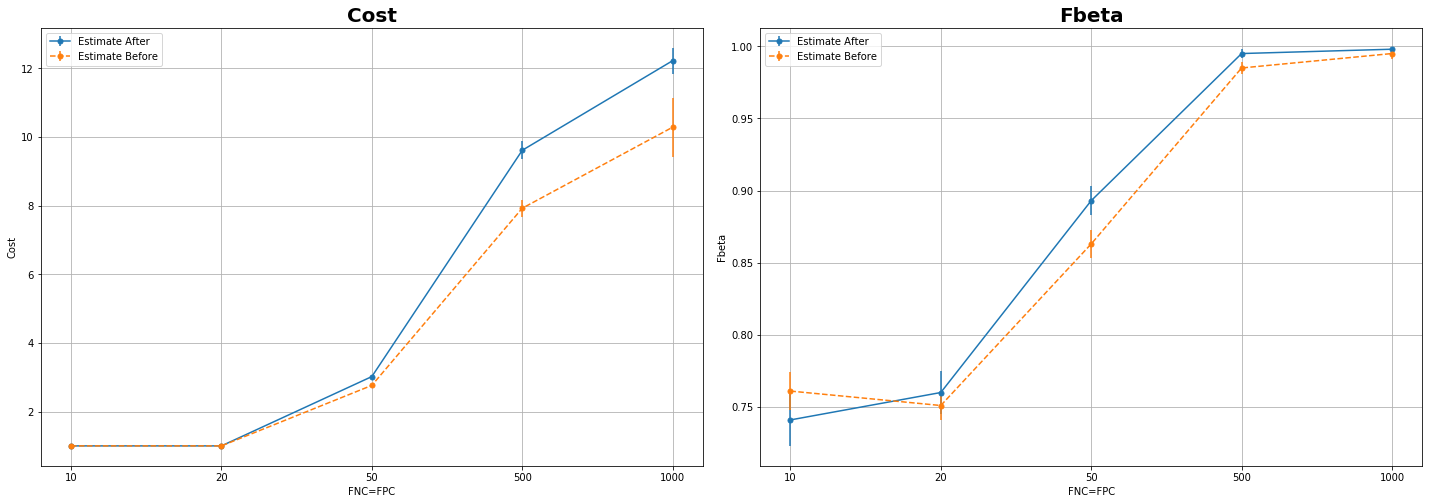

In [2]:
data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')
elems_t = data[data.name.str.startswith('base-')][data.estimate_after == True]
elems_f = data[data.name.str.startswith('base-')][data.estimate_after == False]

print_vars_base(data[data.name.str.startswith('base-')])

elems = [elems_t, elems_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC=FPC", ("Estimate After", "Estimate Before"))

#### Conclusions:
    - When the wrong answer reward increments, the money cost increments 
    - Higher wrong answer cost/money cost increments quality and reduces loss
    - The quality difference between using a wrong answer cost = 500 and higher is minimal, but when higher increments the money cost 

### 1.1 Setting with different values for FNC and PNC

In [18]:
data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results_diff.csv')
results = data[data.name.str.startswith('wrong-cost-')][data.estimate_after == True]
results[['fnc', 'fpc', 'fbeta']]

,fnc,fpc,fbeta
16,-1,-1,0.000
17,-1,-5,0.000
18,-1,-10,0.000
19,-1,-500,0.000
20,-5,-1,0.963
21,-5,-5,0.745
22,-5,-10,0.000
23,-5,-500,0.000
24,-10,-1,0.990
25,-10,-5,0.990


Num Workers: [100]
Workers Distribution: ['Normal(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.5]
Items Difficulty: [0.5]
Num states: [23]
Error Estimations: [False  True]
False Negative Costs: [  -1   -5  -10 -500]
False Positive Costs: [  -1   -5  -10 -500]


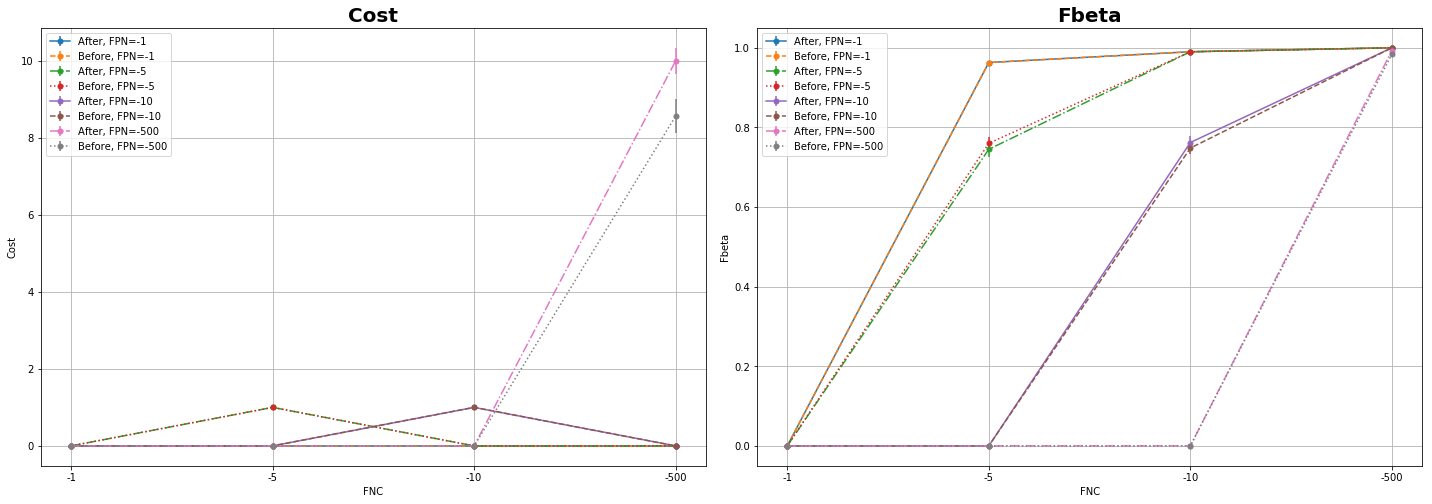

In [4]:
data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results_diff.csv')
elems_t = data[data.name.str.startswith('wrong-cost-')][data.estimate_after == True]
elems_f = data[data.name.str.startswith('wrong-cost-')][data.estimate_after == False]

print_vars(data[data.name.str.startswith('wrong-cost-')])

fncs = data.fnc.unique()

columns = ['cost', 'fbeta']
elems = []
labels = []
for fnc in fncs:
    elems_t_filtered = elems_t[elems_t.fpc == fnc]
    elems_f_filtered = elems_f[elems_f.fpc == fnc]

    elems.append(elems_t_filtered)
    elems.append(elems_f_filtered)
    labels.append(f"After, FPN={fnc}")
    labels.append(f"Before, FPN={fnc}")

plot_elems_lines(elems, fncs, columns, "FNC", labels)

## 2. Test with different number of states in the model of MDP

POMDP definition: 
 - States #: {5,9,13,17}
     (difficulty, true_label)
    - 5:  (0,0)(1,0)(0,1)(1,1)(T)
    - 9:  (0,0)(0.33,0)(0.66,0)(1,0)(0,1)(0.33,1)(0.66,1)(1,1)(T)
    - 13: (0,0)(0.2,0)(0.4,0)(0.6,0)(0.8,0)(1,0)(0,1)(0.2,1)(0.4,1)(0.6,1)(0.8,1)(1,1)(T)
    - 17: (0,0)(0.15,0)(0.3,0)(0.45,0)(0.6,0)(0.75,0)(0.9,0)(1,0)(0,1)(0.15,1)(0.3,1)(0.45,1)(0.6,1)(0.75,1)(0.9,1)(1,1)(T)
    
    
 - Actions: 4 = {RequestVote, SubmitFalse, SubmitTrue}
 
 Transitions: 
 - $T(S_i, Action=RequestVote, S_i) = 1$
 - $T(S_i, Action=SubmitTrue, S_{terminal}) = 1$
 - $T(S_i, Action=SubmitFalse, S_{terminal}) = 1$
 
 Observations probabilities:
 - $O(S_i, RequestVote, CorrectAnswer) = Acc$
 - $O(S_i, RequestVote, IncorrectAnswer) = 1 - Acc$
 
 Worker Accuracy Formula:
 - $Acc(d, \gamma) = \frac{1}{2} (1 + (1 - d)^{\gamma}) $
 
 Rewards:
 - Request vote: -1
 - Correct answer: 0
 - Wrong answer: -500

Workers:
 - Amount: 100
 - Error rate distribution: $\gamma \sim Normal(1, 0.2)$


Num Workers: [100]
Workers Distribution: ['Normal(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.5]
Items Difficulty: [0.5]
Num states: [  5   9  13  17  43 203]
Error Estimations: [False  True]
False Negative Costs == False Positive Costs: [  10   20   50  500 1000]


Results for 5 states




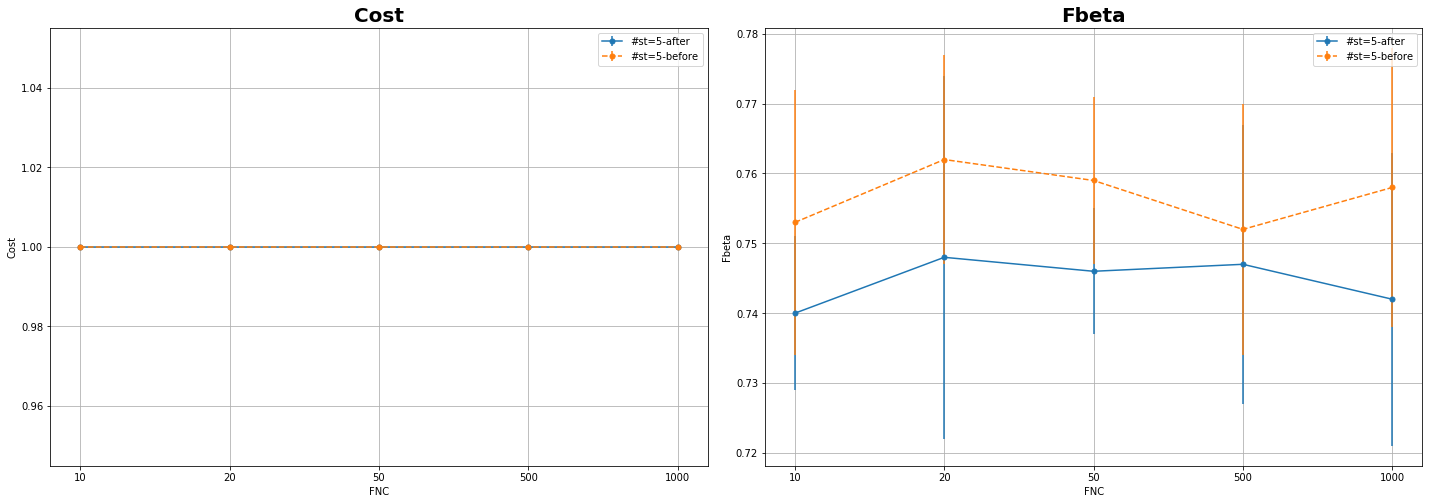



Results for 9 states




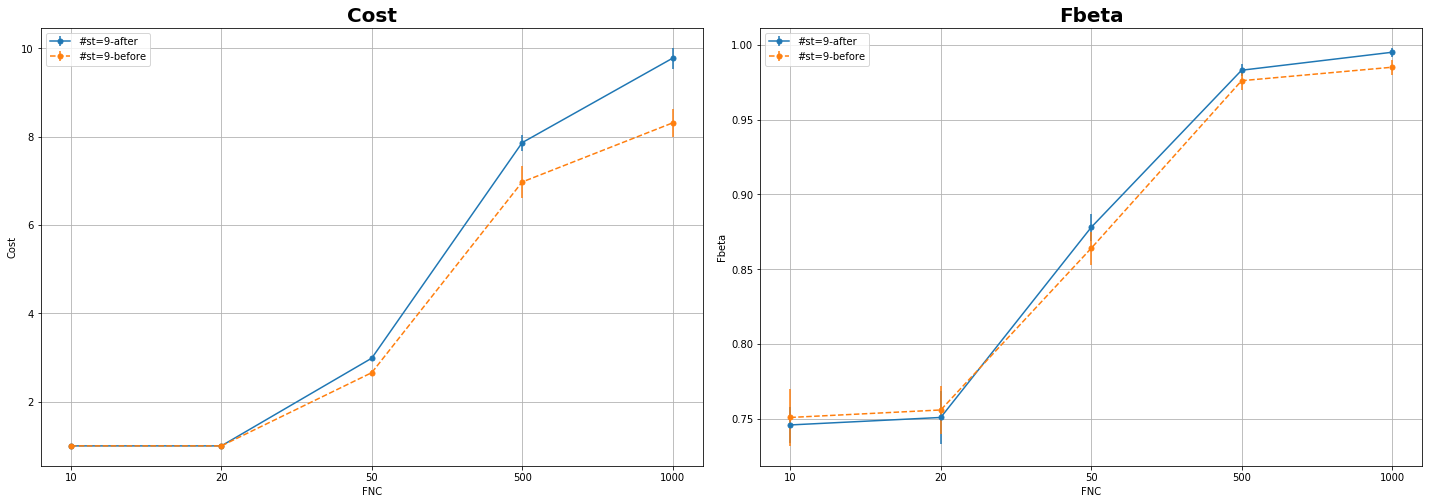



Results for 13 states




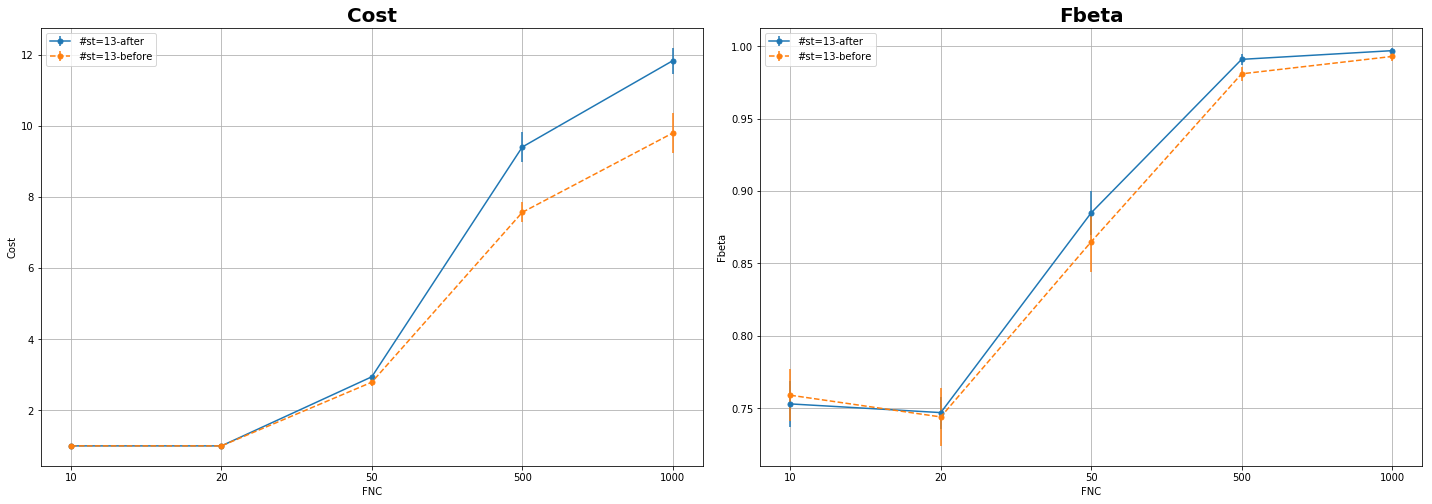



Results for 17 states




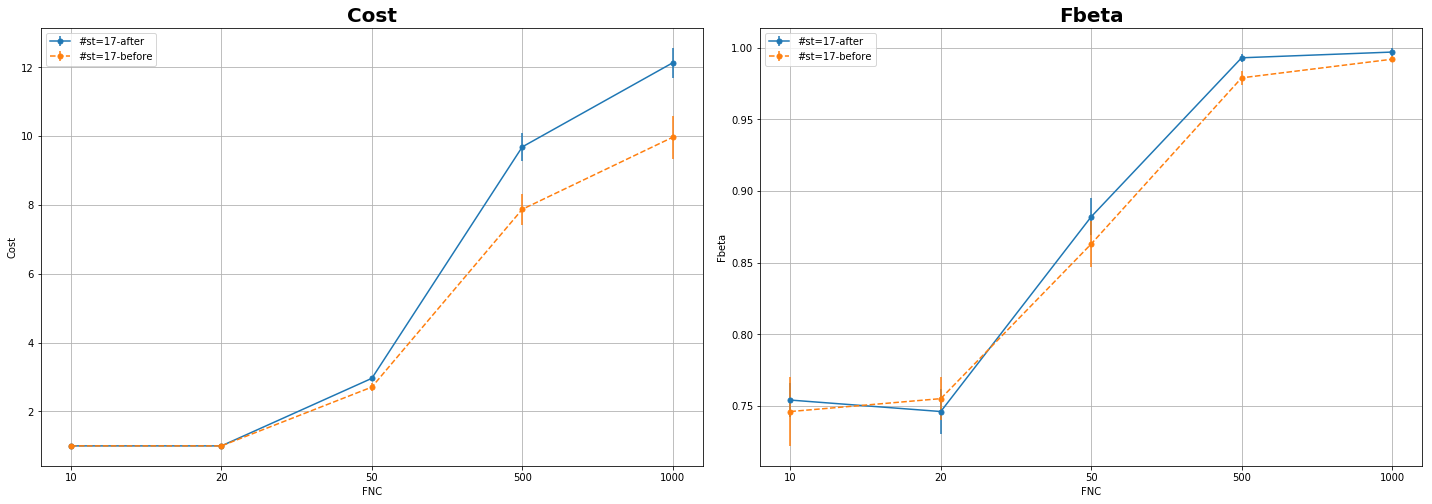



Results for 23 states




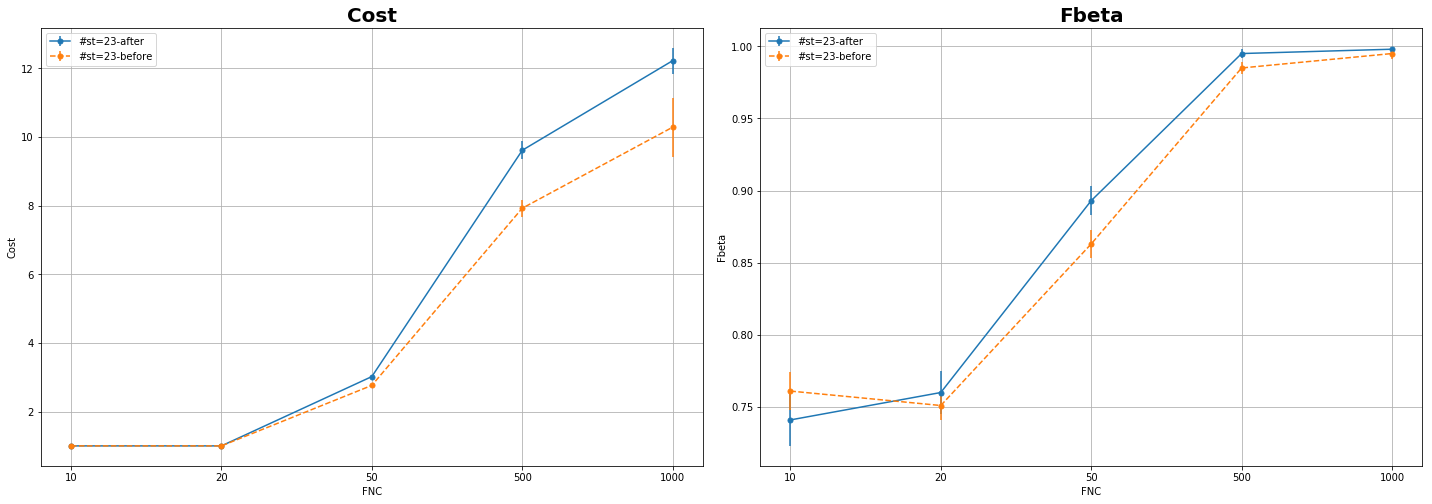



Results for 43 states




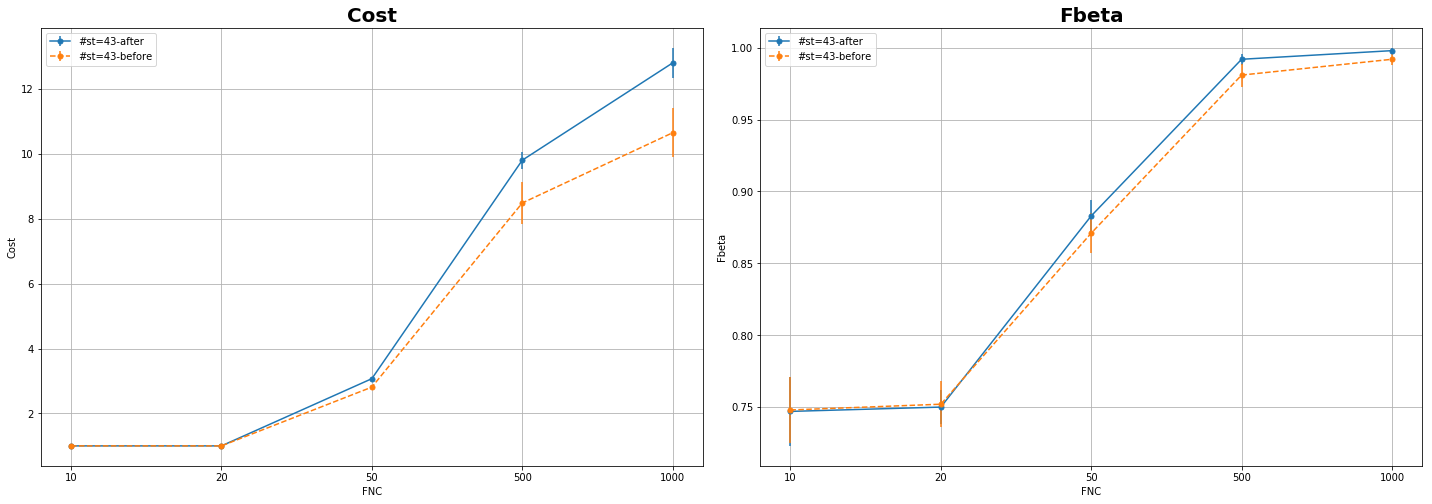



Results for 203 states




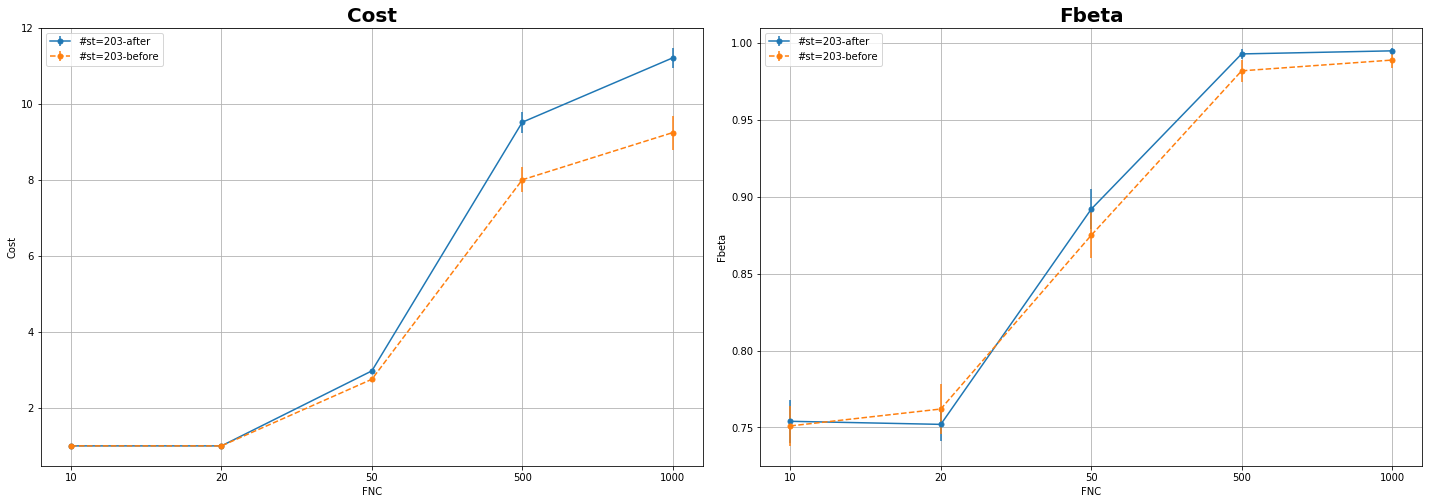



Integrated Results




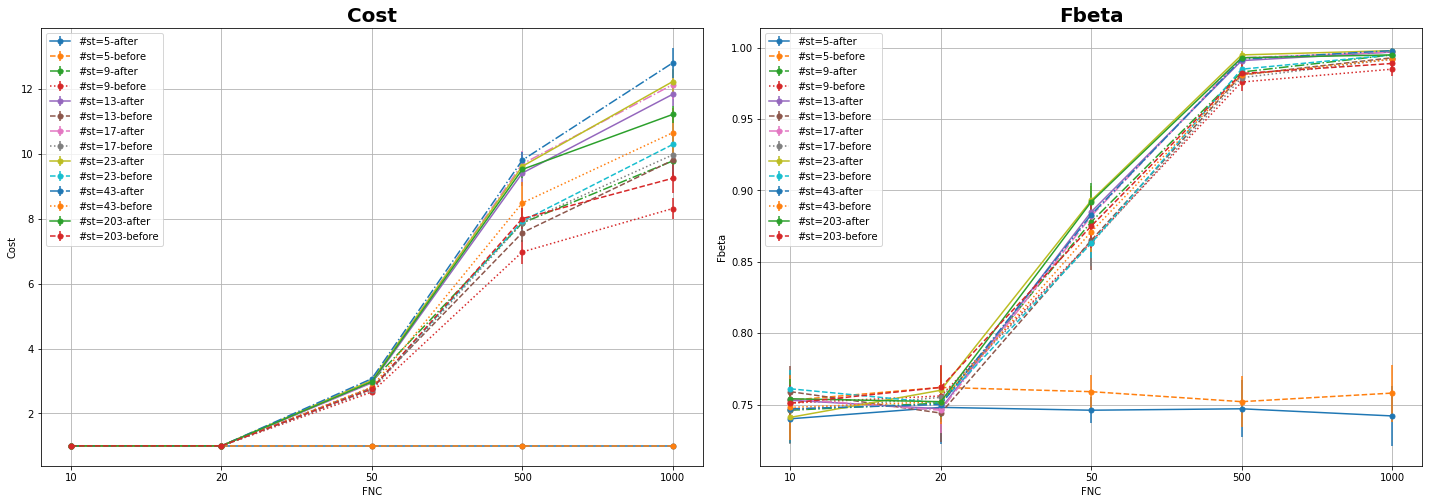

In [5]:
from IPython.core import display as ICD

data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')

total_elems = data[data.name.str.startswith('vary_num_states')]
num_states = total_elems.num_states.unique()
columns = ['cost', 'fbeta']

print_vars_base(total_elems)

labels = []
values = []
num_states = np.append(num_states, 23)
num_states.sort()
num_states = [int(x) for x in num_states]

values_500_t = []
values_500_f = []

elems_base = data[data.name.str.startswith('base-')]

for num_st in num_states:
    
    print("\n")
    print(f"Results for {num_st} states")
    print("\n")
    
    label_after = f"#st={num_st}-after"
    label_before = f"#st={num_st}-before"
    labels.append(label_after)
    labels.append(label_before)
    
    if num_st != 23:
        elems_st = total_elems[total_elems.num_states == num_st]
    else:
        elems_st = elems_base
    
    #compare results  on same 
    elems_t = elems_st[elems_st.estimate_after == True]
    elems_f = elems_st[elems_st.estimate_after == False]
    elems = [elems_t, elems_f]
    
    values_500_t.append(elems_t[elems_st.wrong_cost == 500].iloc[0])
    values_500_f.append(elems_f[elems_st.wrong_cost == 500].iloc[0])
    
    values.append(elems_t)
    values.append(elems_f)
    
    wrong_costs = elems_t.wrong_cost.unique()

    plot_elems_lines(elems, wrong_costs, columns, "FNC", (label_after, label_before))

#plot all
print("\n")
print("Integrated Results")
print("\n")
plot_elems_lines(values, wrong_costs, columns, "FNC", labels)

### 2.1 Setting with different values for FNC and PNC

Num Workers: [100]
Workers Distribution: ['Normal(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.5]
Items Difficulty: [0.5]
Num states: [23]
Error Estimations: [False  True]
False Negative Costs: [  -1   -5  -10 -500]
False Positive Costs: [  -1   -5  -10 -500]


Estimation After?: True


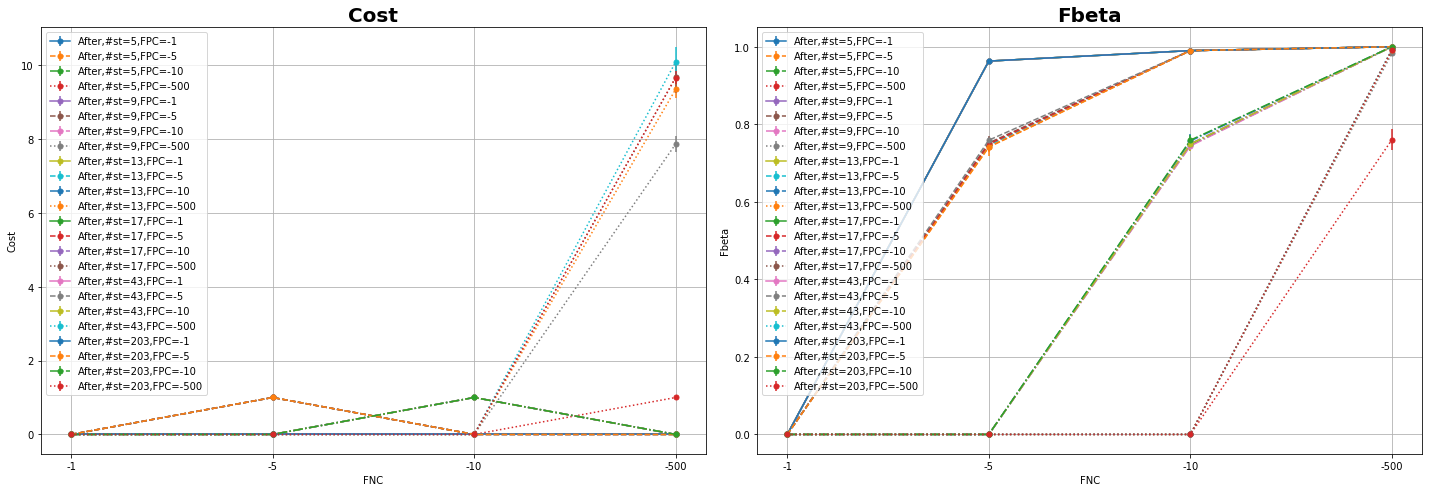



Estimation After?: False


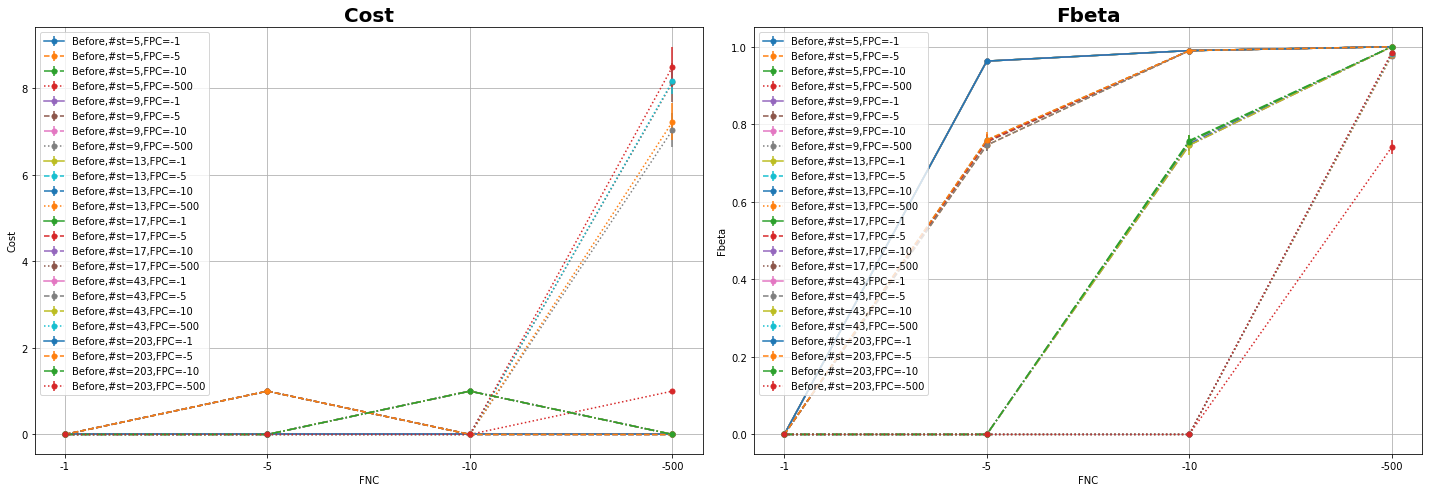

In [5]:
from IPython.core import display as ICD

data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results_diff.csv')
elems_base = data[data.name.str.startswith('base-')]
total_elems = data[data.name.str.startswith('diff-states')]
num_states = total_elems.num_states.unique()
fncs = total_elems.fnc.unique()
columns = ['cost', 'fbeta']

print_vars(data[data.name.str.startswith('wrong-cost-')])

#num_states = np.append(num_states, 23)
num_states.sort()
num_states = [int(x) for x in num_states]



for estimation_moment in [True, False]:
    labels = []
    values = []
    for num_st in num_states:
        for fnc in fncs:
            if estimation_moment:
                label = f"After,#st={num_st},FPC={fnc}"
            else:
                label = f"Before,#st={num_st},FPC={fnc}"

            labels.append(label)

            if num_st != 23:
                elems_st = total_elems[total_elems.num_states == num_st]
            else:
                elems_st = elems_base

            #compare results  on same 
            elems_t = elems_st[elems_st.estimate_after == estimation_moment][elems_st.fpc == fnc]
            values.append(elems_t)

    #plot all
    print("\n")
    print(f"Estimation After?: {estimation_moment}")
    plot_elems_lines(values, fncs, columns, "FNC", labels)

### 2.2 Compare results for reward wrong answer = -500

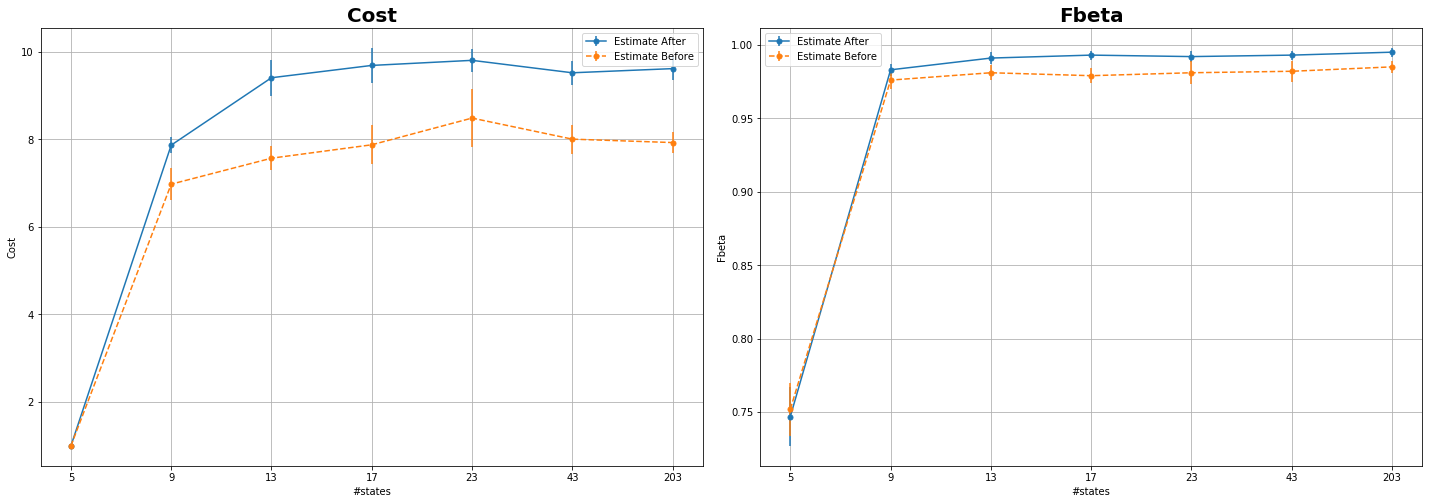

In [90]:
from IPython.core import display as ICD

data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')

elems_less = data[data.name.str.startswith('vary_num_states')][data['wrong_cost'] == 500]
elems_base = data[data.name.str.startswith('base')][data['wrong_cost'] == 500]

elems = pd.concat([elems_less, elems_base])

elems_t = elems[elems.estimate_after == True]
elems_f = elems[elems.estimate_after == False]

elems = [elems_t, elems_f]

num_states = elems_f.num_states.unique()
num_states.sort()
num_states = [int(x) for x in num_states]

columns = ['cost', 'fbeta']

plot_elems_lines(elems, num_states, columns, "#states", ("Estimate After", "Estimate Before"))

#### Conclusions:
    - When varying the number of states, from 9 states and up the quality metrics are similar
    - From 13 states and up the money cost are similar 
    - With 5 states the representation of the world is bad and only 1 vote is collected before classifying the item

## 3. Try adding 1 more action: "leave item unclassified"

POMDP definition: 
 - States: 23
 - Actions: 4 = {RequestVote, SubmitFalse, SubmitTrue, LeaveUnclassified}
 
 Transitions: 
 - $T(S_i, Action=RequestVote, S_i) = 1$
 - $T(S_i, Action=SubmitTrue, S_{terminal}) = 1$
 - $T(S_i, Action=SubmitFalse, S_{terminal}) = 1$
 - $T(S_i, Action=LeaveUnclassified, S_{terminal}) = 1$
 
 Observations probabilities:
 - $O(S_i, RequestVote, CorrectAnswer) = Acc$
 - $O(S_i, RequestVote, IncorrectAnswer) = 1 - Acc$
 
 Worker Accuracy Formula:
 - $Acc(d, \gamma) = \frac{1}{2} (1 + (1 - d)^{\gamma}) $
 
 Rewards:
 - Request vote: -1
 - Correct answer: 0
 - Wrong answer: -500
 - Leave Unclassified: -5

Workers:
 - Amount: 100
 - Error rate distribution: $\gamma \sim Normal(1, 0.2)$


Num Workers: [1000]
Workers Distribution: ['Normal(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.5]
Items Difficulty: [0.5]
Num states: [23]
Error Estimations: [False  True]
False Negative Costs == False Positive Costs: [  10   20   50  500 1000]


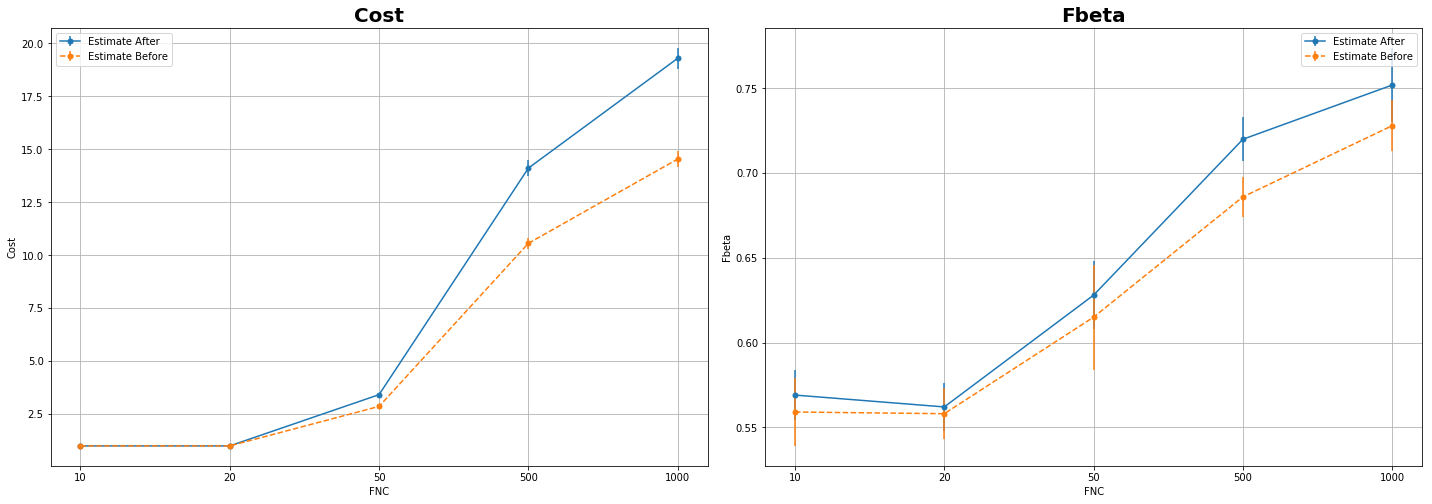

In [6]:
from IPython.core import display as ICD

data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')
unclassified = data[data.name.str.startswith('unclassify-')]

print_vars_base(unclassified)

elems_t = unclassified[unclassified.estimate_after == True]
elems_f = unclassified[unclassified.estimate_after == False]

elems = [elems_t, elems_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Estimate After", "Estimate Before"))

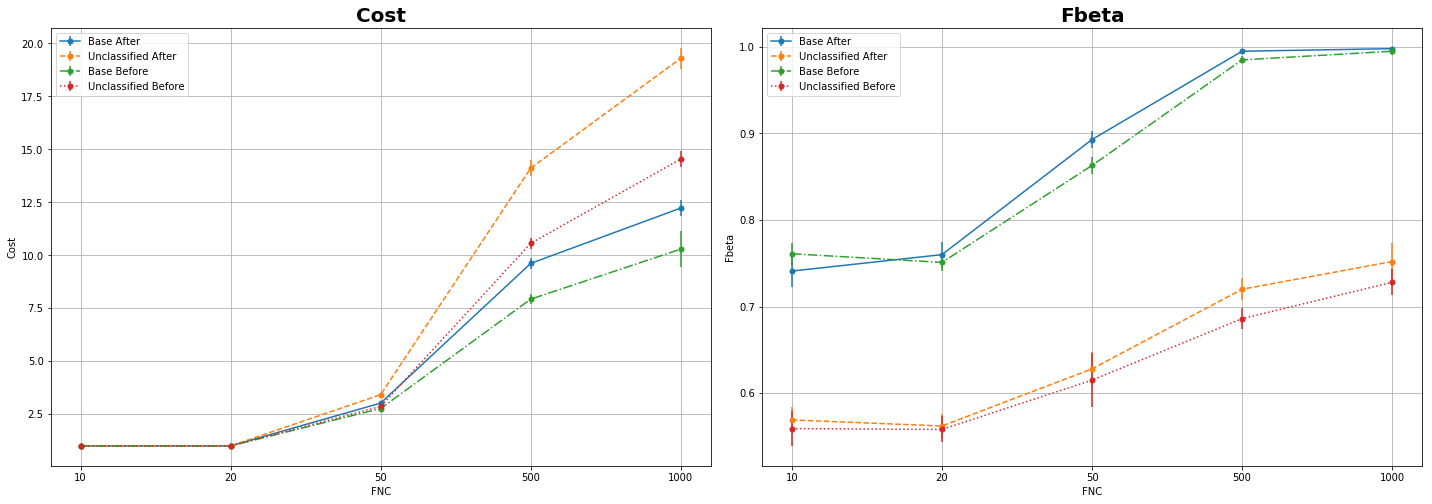

In [47]:
data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')

elems_base = data[data.name.str.startswith('base-')]
elems_unc = data[data.name.str.startswith('unclassify-')]

base_t = elems_base[elems_base.estimate_after == True]
base_f = elems_base[elems_base.estimate_after == False]

unc_t = elems_unc[elems_unc.estimate_after == True]
unc_f = elems_unc[elems_unc.estimate_after == False]

elems = [base_t,unc_t, base_f,unc_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Base After", "Unclassified After", "Base Before", "Unclassified Before"))

### Unclassify with different FNC and FPC

Num Workers: [1000]
Workers Distribution: ['Normal(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.5]
Items Difficulty: [0.5]
Num states: [23]
Error Estimations: [False  True]
False Negative Costs: [  -1   -5  -10 -500]
False Positive Costs: [  -1   -5  -10 -500]


UCC: 0.5


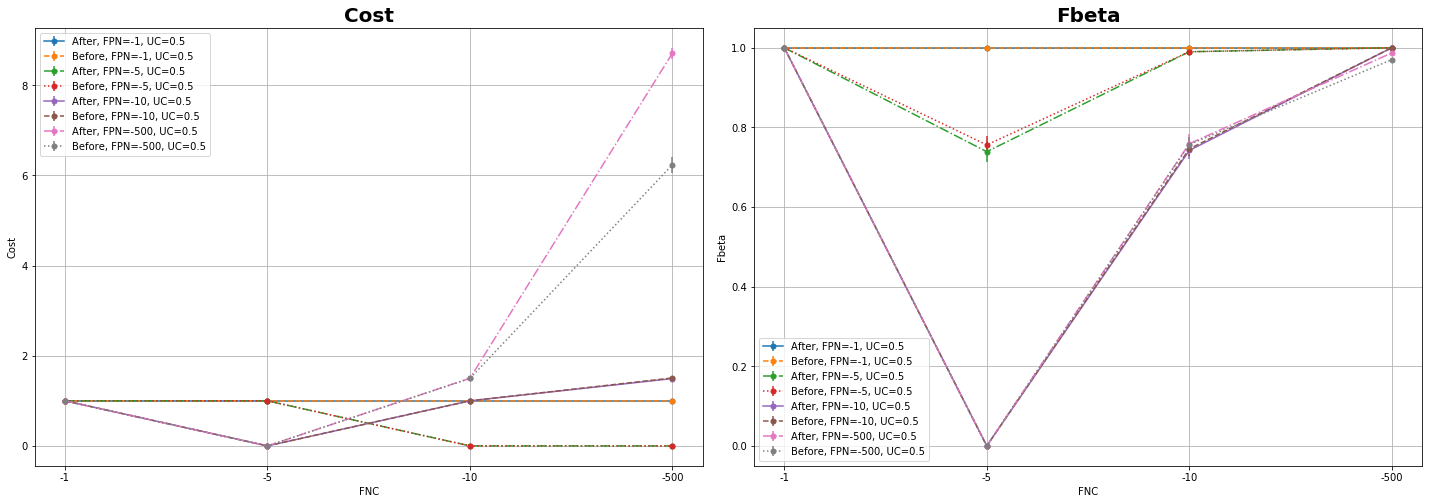



UCC: 2.5


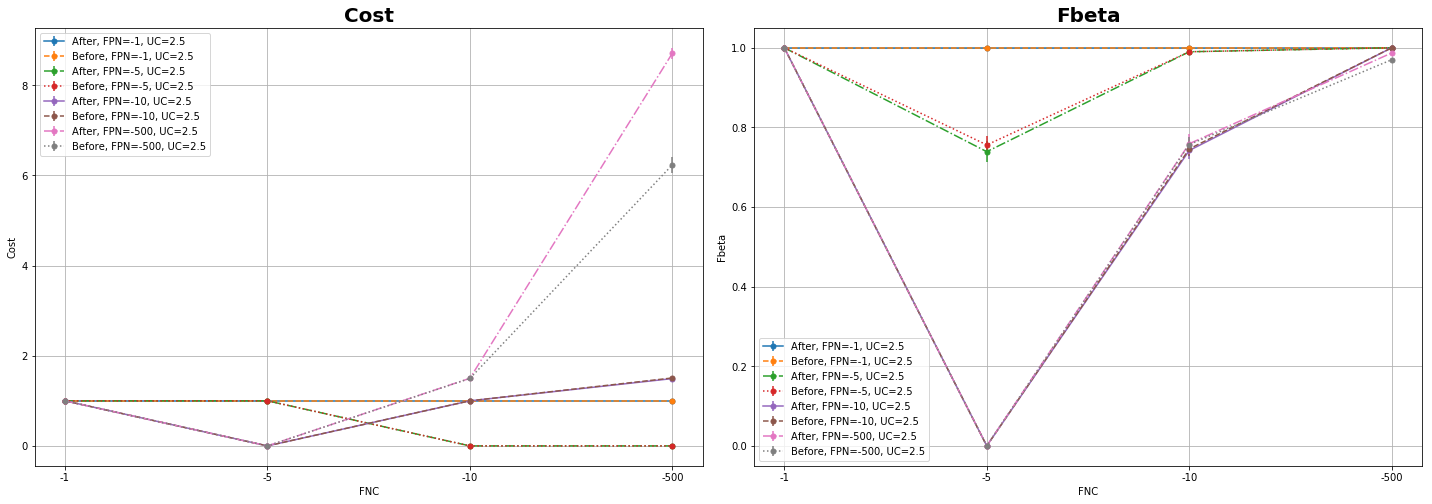



UCC: 5.0


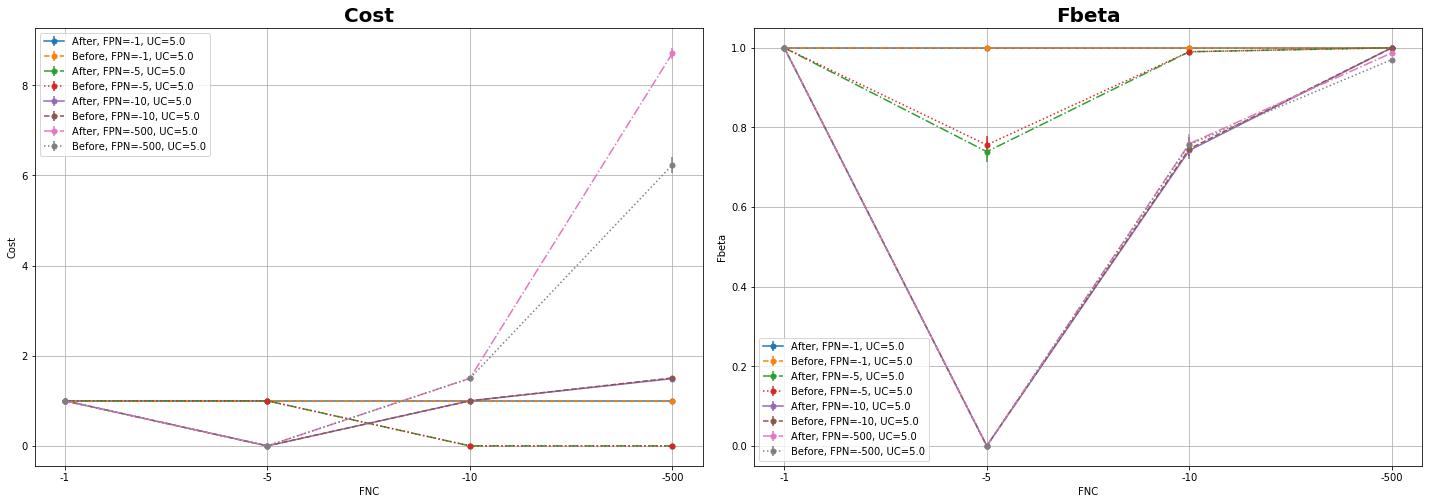



UCC: 250.0


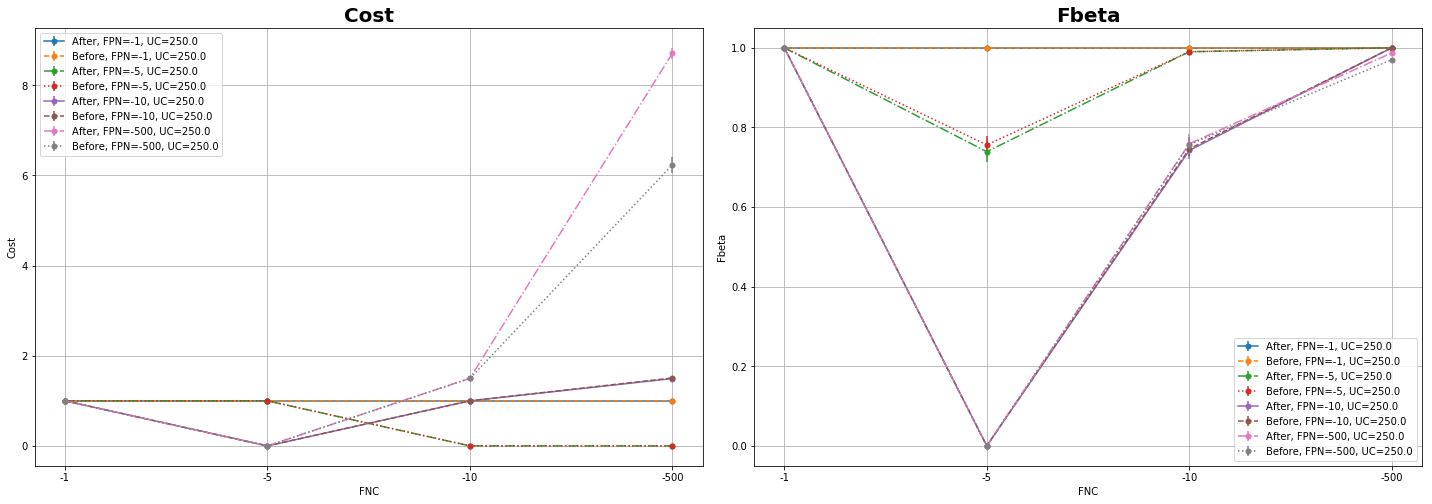

In [9]:
data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results_diff.csv')

elems_all = data[data.name.str.startswith('unclassify-')]

print_vars(elems_all)

fncs = elems_all.fnc.unique()

ucs = [abs(x) / 2 for x in fncs]
for uc in ucs:
    print("\n")
    print(f"UCC: {uc}")
    elems = []
    labels = []

    for fnc in fncs:
        elems_unc = data[data.name.str.startswith('unclassify-')]
        unc_t = elems_unc[elems_unc.estimate_after == True][elems_unc.fpc == fnc]
        unc_f = elems_unc[elems_unc.estimate_after == False][elems_unc.fpc == fnc]
        elems.append(unc_t)
        elems.append(unc_f)

        labels.append(f"After, FPN={fnc}, UC={uc}")
        labels.append(f"Before, FPN={fnc}, UC={uc}")


    columns = ['cost', 'fbeta']
    plot_elems_lines(elems, fncs, columns, "FNC", labels)

#### Conclusions:
    - Adding the action "leave item unclassify" dont improve results, increments costs and quality is lower than base
    

## 4. Try with different real error rate distribution

POMDP definition: 
 - States: 23
 
 Transitions: 
 - $T(S_i, Action=RequestVote, S_i) = 1$
 - $T(S_i, Action=SubmitTrue, S_{terminal}) = 1$
 - $T(S_i, Action=SubmitFalse, S_{terminal}) = 1$
 
 Observations probabilities:
 - $O(S_i, RequestVote, CorrectAnswer) = Acc$
 - $O(S_i, RequestVote, IncorrectAnswer) = 1 - Acc$
 
 Worker Accuracy Formula:
 - $Acc(d, \gamma) = \frac{1}{2} (1 + (1 - d)^{\gamma}) $
 
 Rewards:
 - Request vote: -1
 - Correct answer: 0
 - Wrong answer: {-10, -20, -50, -500, -1000}

Workers:
 - Amount: 100

### 4.1 Worker error rate distribution: Bimodal
 - 50%: $\gamma \sim Normal(.2, 0.01)$
 - 50%: $\gamma \sim Normal(4, 0.2)$ 

Num Workers: [100]
Workers Distribution: ['BiModal(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.5]
Items Difficulty: [0.5]
Num states: [23]
Error Estimations: [False  True]
False Negative Costs == False Positive Costs: [  10   20   50  500 1000]


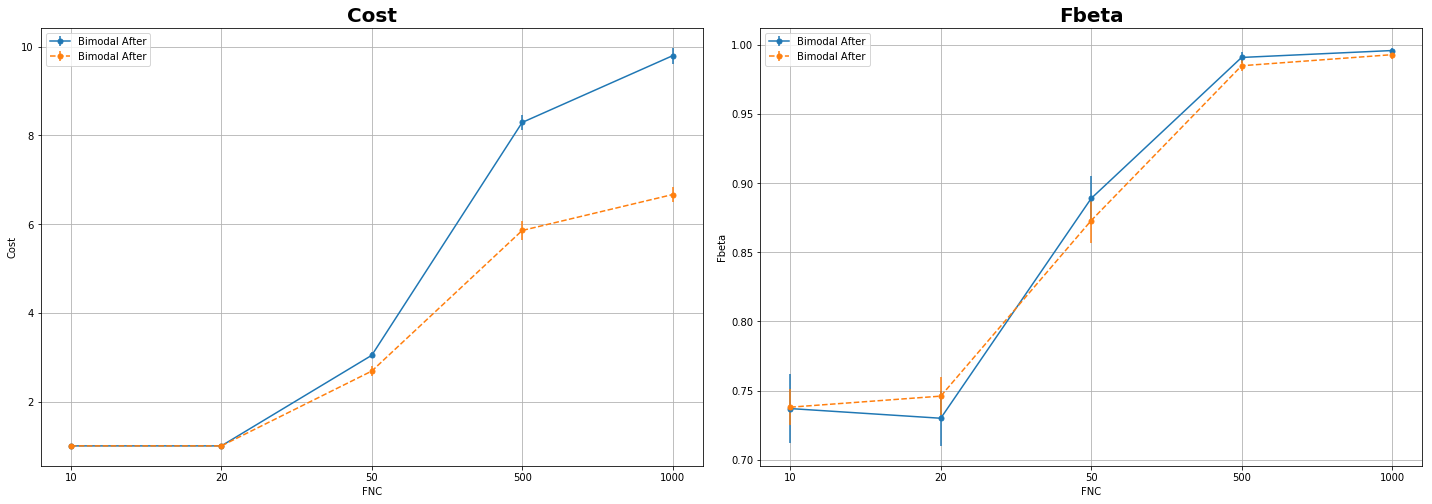

In [7]:
from IPython.core import display as ICD

data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')
elems = data[data.name.str.startswith('bimodal')]

print_vars_base(elems)

elems_t = elems[elems.estimate_after == True]
elems_f = elems[elems.estimate_after == False]

elems = [elems_t,elems_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Bimodal After", "Bimodal After"))

### 4.2 Worker error rate distribution (good workers - low error)

- 100%: $\gamma \sim Normal(0.2, 0.01)$

Num Workers: [100]
Workers Distribution: ['BiModal(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.5]
Items Difficulty: [0.5]
Num states: [23]
Error Estimations: [False  True]
False Negative Costs == False Positive Costs: [  10   20   50  500 1000]


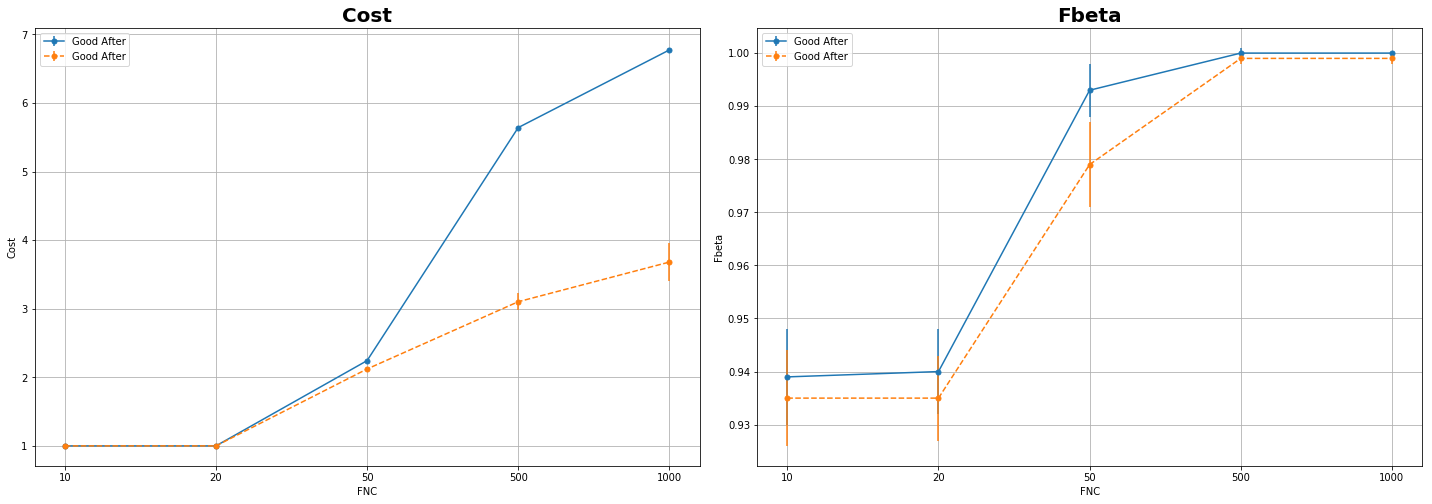

In [8]:
from IPython.core import display as ICD

data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')
elems = data[data.name.str.startswith('good')]

print_vars_base(elems)

elems_t = elems[elems.estimate_after == True]
elems_f = elems[elems.estimate_after == False]

elems = [elems_t,elems_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Good After", "Good After"))


### 4.3 Worker error rate distribution (bad workers - high error):  $\gamma \sim Normal(4, 0.2)$ 
- 100%: $\gamma \sim Normal(4, 0.2)$

Num Workers: [ 100 1000]
Workers Distribution: ['BiModal(1,0.2)' 'Normal(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.5]
Items Difficulty: [0.5]
Num states: [23]
Error Estimations: [False  True]
False Negative Costs == False Positive Costs: [  10   20   50  500 1000]


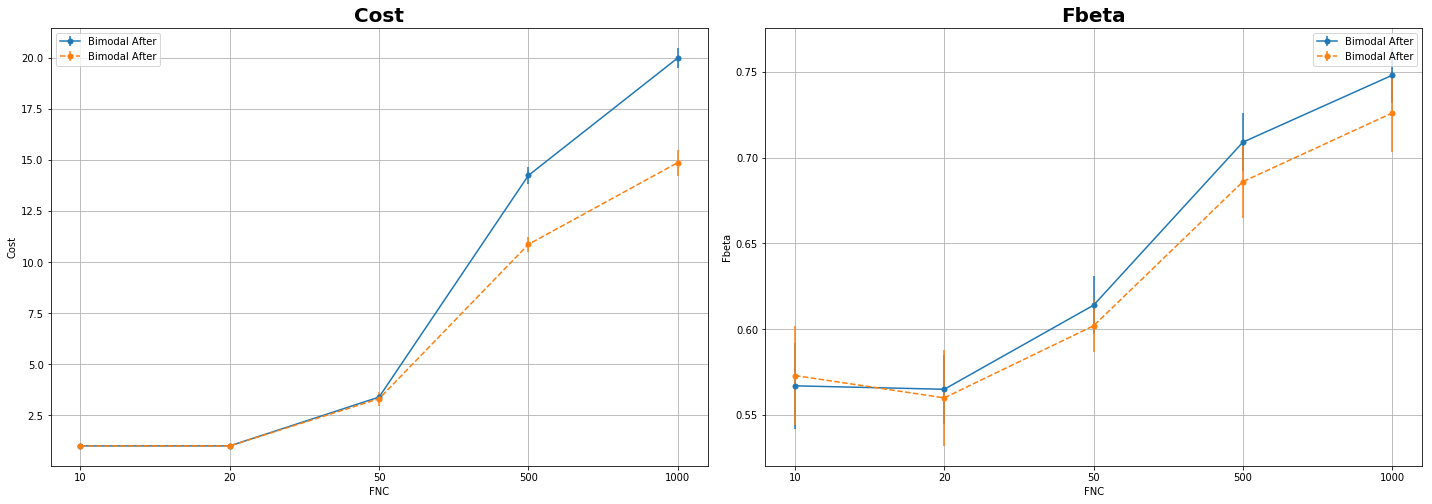

In [9]:
from IPython.core import display as ICD

data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')
elems = data[data.name.str.startswith('bad')]

print_vars_base(elems)

elems_t = elems[elems.estimate_after == True]
elems_f = elems[elems.estimate_after == False]

elems = [elems_t,elems_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Bimodal After", "Bimodal After"))

### Integrated results

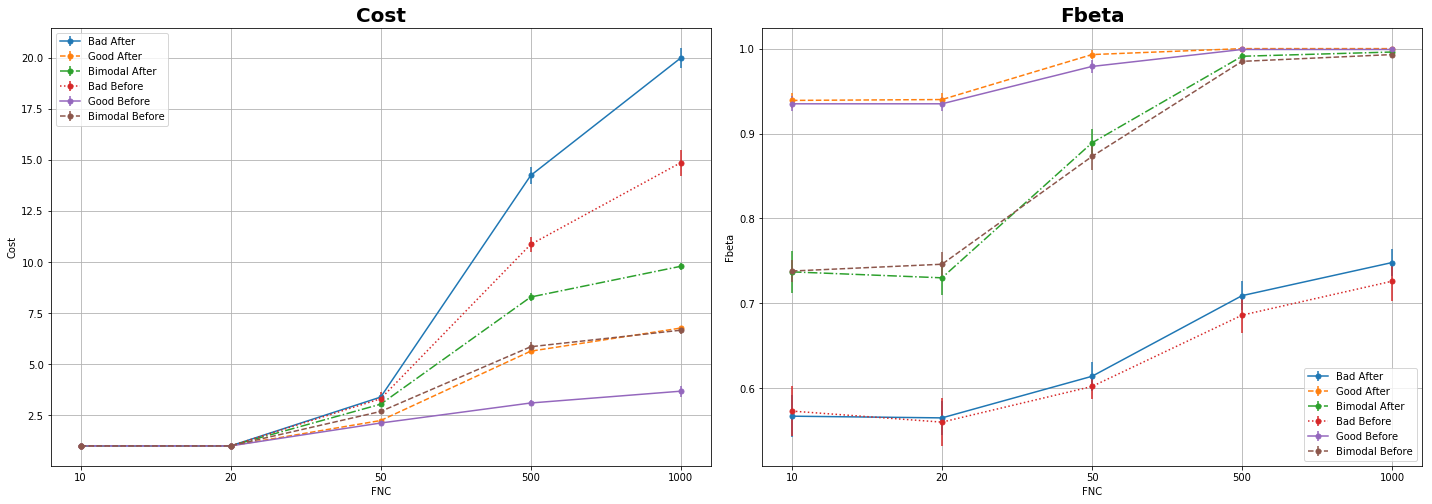

In [96]:
from IPython.core import display as ICD

data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')
bad = data[data.name.str.startswith('bad')]
good = data[data.name.str.startswith('good')]
bimodal = data[data.name.str.startswith('bimodal')]

bad_t = bad[bad.estimate_after == True]
bad_f = bad[bad.estimate_after == False]
good_t = good[good.estimate_after == True]
good_f = good[good.estimate_after == False]
bimodal_t = bimodal[bimodal.estimate_after == True]
bimodal_f = bimodal[bimodal.estimate_after == False]

elems = [bad_t,good_t,bimodal_t,bad_f,good_f,bimodal_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Bad After","Good After","Bimodal After", "Bad Before", "Good Before", "Bimodal Before"))

#### Conclusions:
    - The approach is sensitive to workers accuracy
    - When accuracy is lower it requests more votes but the quality is not leveraged proportionally
    

## 5. Workers error rate with a confusion matrix
- a worker error rate for possitive label class
- a higher worker error rate for negative label class



POMDP definition: 
 - States: 23
 
 Transitions: 
 - $T(S_i, Action=RequestVote, S_i) = 1$
 - $T(S_i, Action=SubmitTrue, S_{terminal}) = 1$
 - $T(S_i, Action=SubmitFalse, S_{terminal}) = 1$
 
 Observations probabilities:
 - $O(S_i, RequestVote, CorrectAnswer) = Acc$
 - $O(S_i, RequestVote, IncorrectAnswer) = 1 - Acc$
 
 Worker Accuracy Formula:
 - $Acc(d, \gamma) = \frac{1}{2} (1 + (1 - d)^{\gamma}) $
 
 Rewards:
 - Request vote: -1
 - Correct answer: 0
 - Wrong answer: {-10, -20, -50, -500, -1000}

Workers:
 - Amount: 100

Confusion Matrix:
 - Exclusion Error: $\gamma \sim Normal(1, 0.2)$
 - Inclusion Error: $\gamma \sim Normal(2, 0.2)$ 

Num Workers: [1000]
Workers Distribution: ['NormalConfusion(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.5]
Items Difficulty: [0.5]
Num states: [23]
Error Estimations: [False  True]
False Negative Costs == False Positive Costs: [  10   20   50  500 1000]


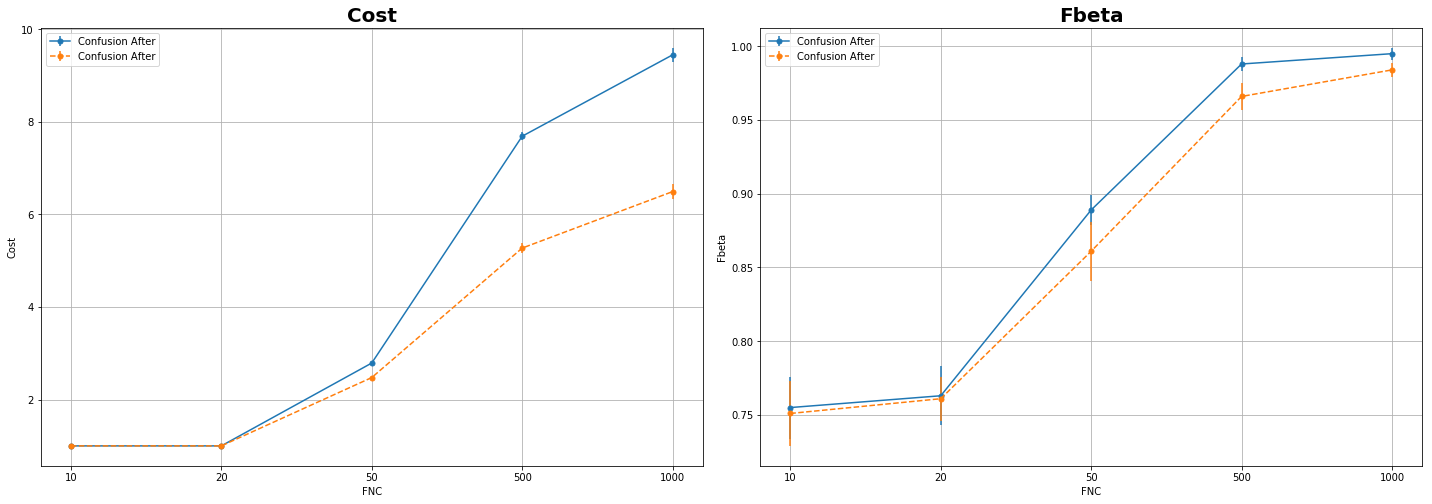

In [10]:
from IPython.core import display as ICD

#print("Estimate after 2 votes")
data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')
elems = data[data.name.str.startswith('confusion-')]

print_vars_base(elems)

elems_t = elems[elems.estimate_after == True]
elems_f = elems[elems.estimate_after == False]

elems = [elems_t,elems_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Confusion After", "Confusion After"))

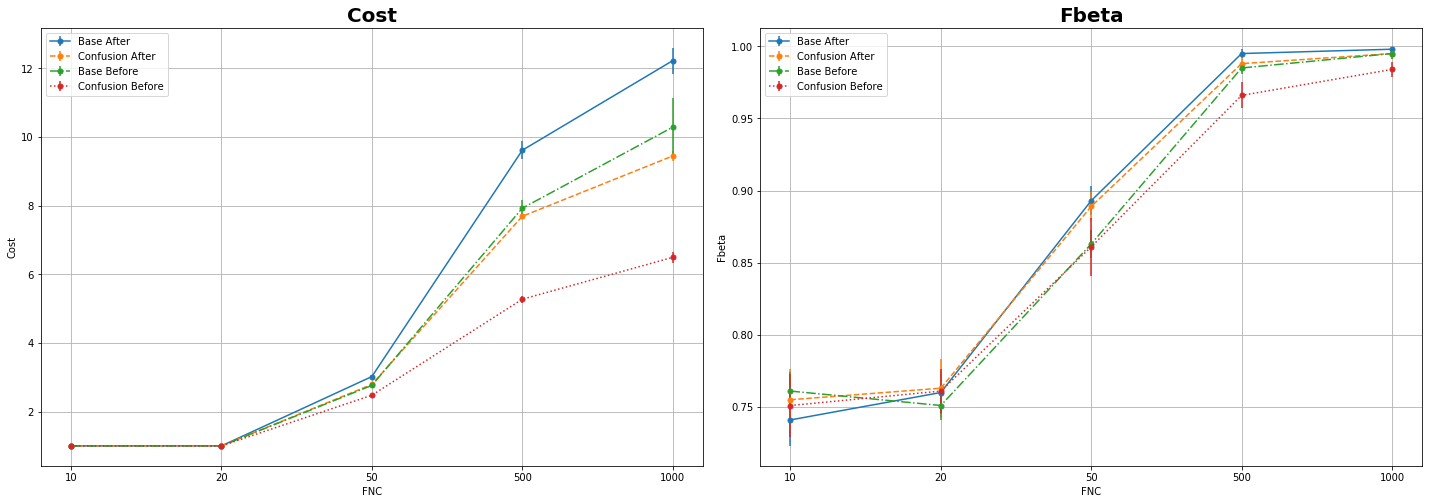

In [99]:
data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')

elems_base = data[data.name.str.startswith('base-')]
elems_unc = data[data.name.str.startswith('confusion-')]

base_t = elems_base[elems_base.estimate_after == True]
base_f = elems_base[elems_base.estimate_after == False]

unc_t = elems_unc[elems_unc.estimate_after == True]
unc_f = elems_unc[elems_unc.estimate_after == False]

elems = [base_t,unc_t, base_f,unc_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Base After", "Confusion After", "Base Before", "Confusion Before"))



#### Conclusions:
    - Representing workers accuracy with a confusion matrix reduces the money cost(less votes collected per item) and       
    similar(sometimes a bit higher) quality is obtained
    - The little increments can be explained because workers exclusion accuracy is 10% higher than inclusion

## 6. Dont update belief immediately using average error rate, first compute each worker error rate
- Using worker error rate with distribution Normal(1, 0.2)
- Change logic to the following procedure, for each item $i \in I$, and a set of workers $W$ :
    1. Request vote for an item i
    2. Collect a worker vote over item i
    3. Estimate worker error rate and item true label using EM
    4. Update belief state over item i


Estimate after 2 votes


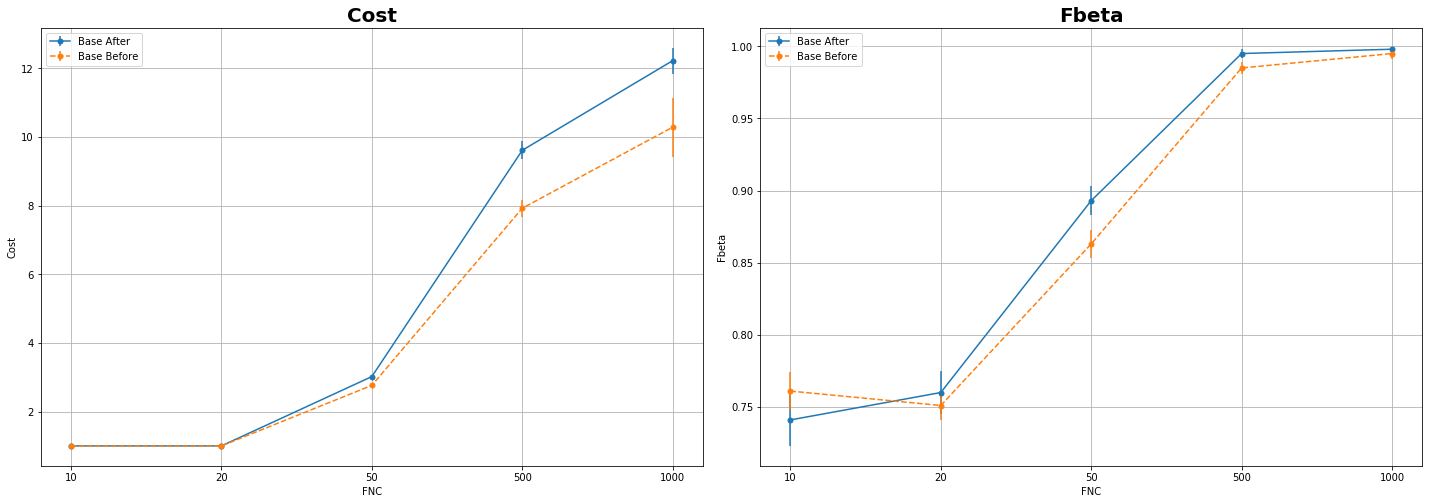

In [12]:
from IPython.core import display as ICD

print("Estimate after 2 votes")
data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')
elems = data[data.name.str.startswith('base-')]

elems_t = elems[elems.estimate_after == True]
elems_f = elems[elems.estimate_after == False]

elems = [elems_t,elems_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Base After", "Base Before"))

#### Conclusions:
    - Estimating workers error rate doesn't improve results
    - This can be caused because when the estimation is done many of the workers only voted over only 1 item
        - We would need to try changing the voting mechanism to make the same worker vote over a set(or all) the items

## 7. Try different dataset balances

### Results over differente balances, same wrong answer reward

Unbalanced
Num Workers: [100]
Workers Distribution: ['Normal(1,0.2)']
Workers Initial Error Rate: [1]
Num Items: [1000]
Items Balance: [0.01 0.1  0.3 ]
Items Difficulty: [0.5]
Num states: [23]
Error Estimations: [False  True]
False Negative Costs == False Positive Costs: [500]


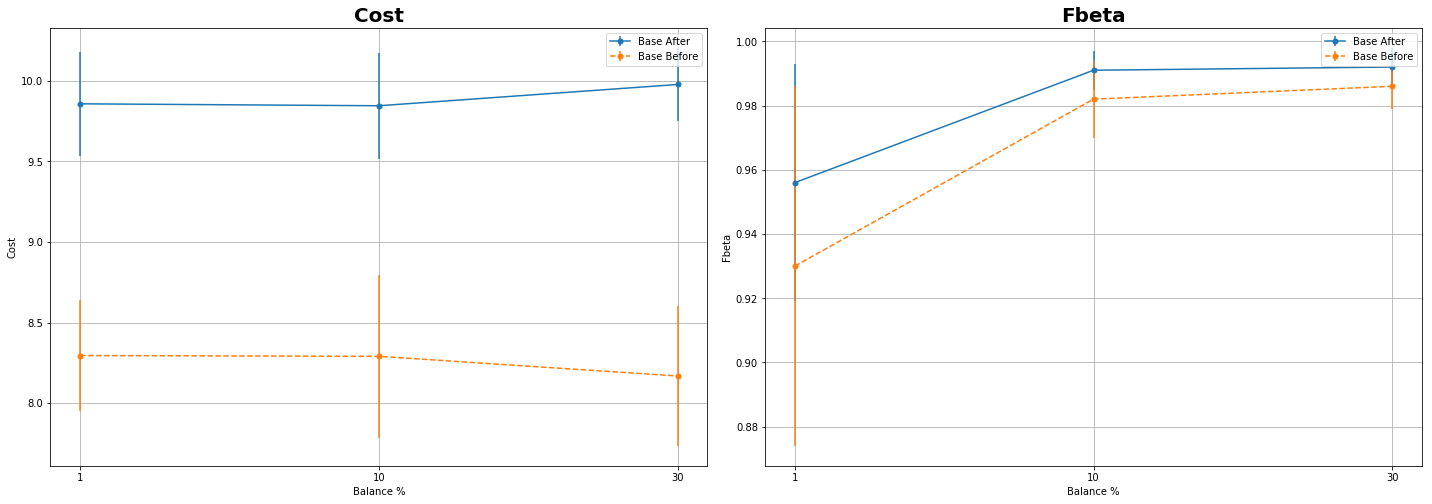

In [13]:
from IPython.core import display as ICD

print("Unbalanced")
data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')
elems = data[data.name.str.startswith('unbalanced-')][data.wrong_cost == 500]

print_vars_base(elems)

elems_t = elems[elems.estimate_after == True]
elems_f = elems[elems.estimate_after == False]

elems = [elems_t,elems_f]

columns = ['cost', 'fbeta']
data_bals = elems[0].data_bal.unique()
data_bals = [int(x * 100) for x in data_bals]
plot_elems_lines(elems, data_bals, columns, "Balance %", ("Base After", "Base Before"))

### Results over same unbalance, different wrong answer rewards

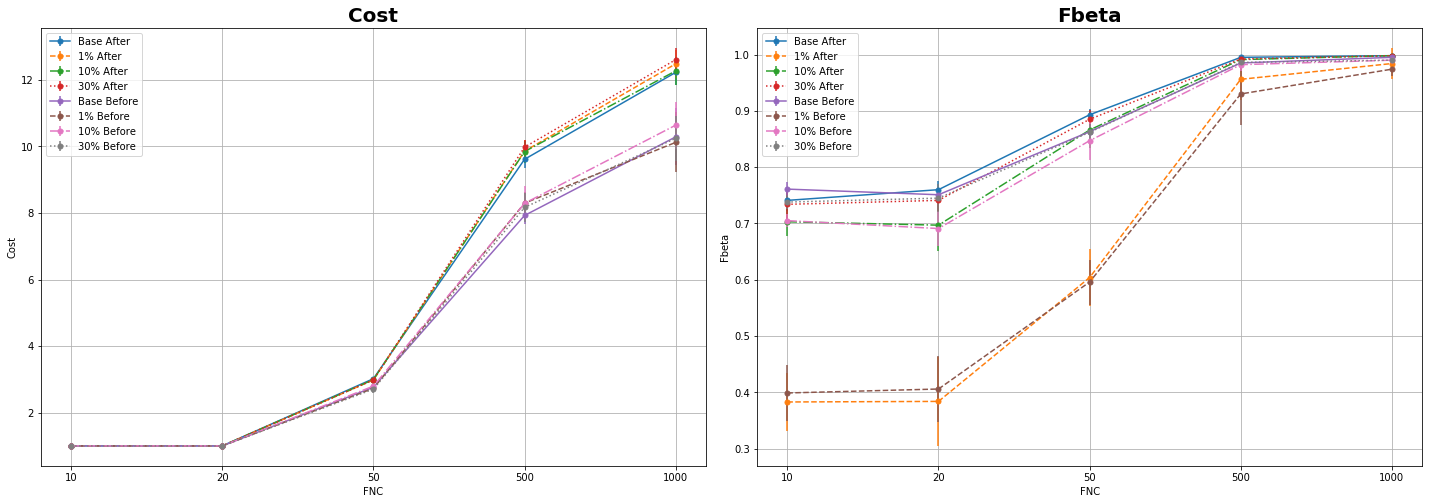

In [108]:
from IPython.core import display as ICD
data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')

base = data[data.name.str.startswith('base-')]
elems = data[data.name.str.startswith('unbalanced-')]

base_t = base[base.estimate_after == True]
base_f = base[base.estimate_after == False]

elems_t_01 = elems[elems.estimate_after == True][data.data_bal == 0.01]
elems_f_01 = elems[elems.estimate_after == False][data.data_bal == 0.01]
elems_t_10 = elems[elems.estimate_after == True][data.data_bal == 0.1]
elems_f_10 = elems[elems.estimate_after == False][data.data_bal == 0.1]
elems_t_30 = elems[elems.estimate_after == True][data.data_bal == 0.3]
elems_f_30 = elems[elems.estimate_after == False][data.data_bal == 0.3]

elems = [base_t,elems_t_01,elems_t_10,elems_t_30,base_f,elems_f_01,elems_f_10,elems_f_30]

columns = ['cost', 'fbeta']
data_bals = elems[0].data_bal.unique()
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Base After","1% After", "10% After", "30% After","Base Before","1% Before", "10% Before", "30% Before"))

## 8. Try to have an insight about next items belief state
- think in if we see a big % of items classified in a class and a new item arrives, the prob distribution over states should not be equally likely between all states

to-do